In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 4. Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
gdp_df = pd.read_csv(
    r"C:\Users\hunte\Documents\NNS-DDA10\python\projects\un_data-hunterfogg668\data\gdp_percapita.csv.csv")

In [3]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN


# 5. How many rows and columns are in `gdp_df`? What are the data types of each column? 7176 rows, 4 columns; float64, float64, int64, object

In [4]:
gdp_df.shape

(7176, 4)

In [5]:
gdp_df.dtypes


Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

# 6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'. 

In [6]:
gdp_df_2 = gdp_df.drop(columns = ['Value Footnotes'])
gdp_df_2 = gdp_df_2.rename(columns = {'Country or Area' : 'Country', 'Year' : 'Year', 'Value' : 'GDP_Per_Capita'})
gdp_df_2

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


# 7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

#find data with 31 observations

In [7]:
new_gdp = gdp_df_2.Country.value_counts().to_frame().reset_index()
new_gdp.loc[new_gdp.Country == 31]

,index,Country
0,Least developed countries: UN classification,31
1,Niger,31
2,Middle East & North Africa (IDA & IBRD),31
3,Middle income,31
4,Mongolia,31
...,...,...
200,IDA only,31
201,Fragile and conflict affected situations,31
202,Ireland,31
203,France,31


In [8]:
new_gdp.loc[new_gdp.Country != 31].shape

(37, 2)

In [9]:
year_gdp = gdp_df_2.Year.value_counts()
year_gdp

2018    242
2017    242
2016    242
2015    242
2014    242
2013    242
2019    241
2020    240
2012    240
2011    240
2010    239
2009    239
2008    238
2007    237
2006    237
2004    236
2005    236
2003    235
2002    235
2001    234
2000    233
1999    227
1998    226
1997    226
1996    222
1995    222
1994    211
1993    209
1992    208
1991    207
1990    206
Name: Year, dtype: int64

# 8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

#Different Visualizations

C:\Users\hunte\AppData\Local\Temp\ipykernel_6856\3891047880.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=gdp_df_2['GDP_Per_Capita'])


<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

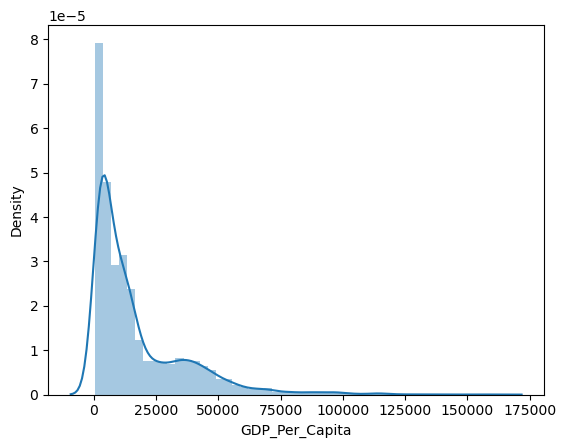

In [10]:
sns.distplot(a=gdp_df_2['GDP_Per_Capita'])

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

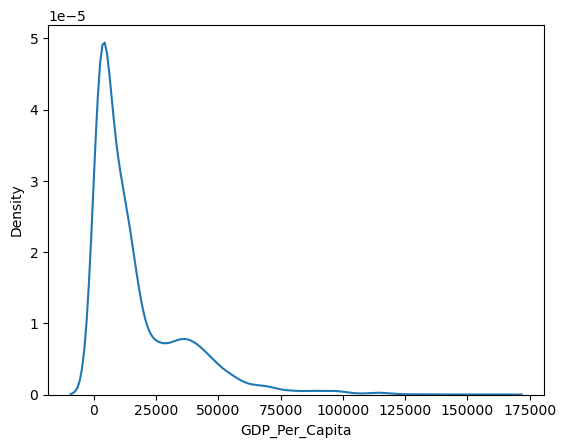

In [11]:
sns.kdeplot(gdp_df_2['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

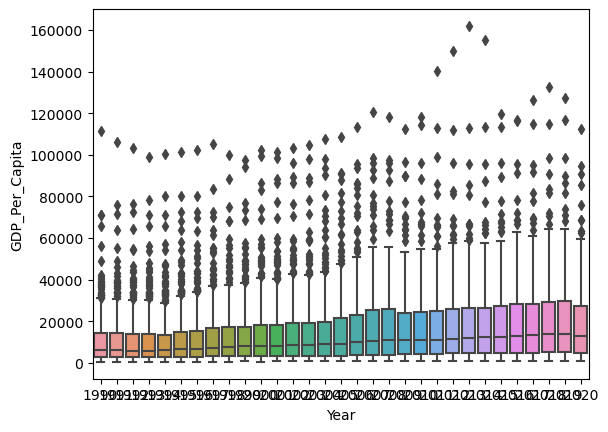

In [12]:
sns.boxplot(x = gdp_df_2['Year'], y = gdp_df_2['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

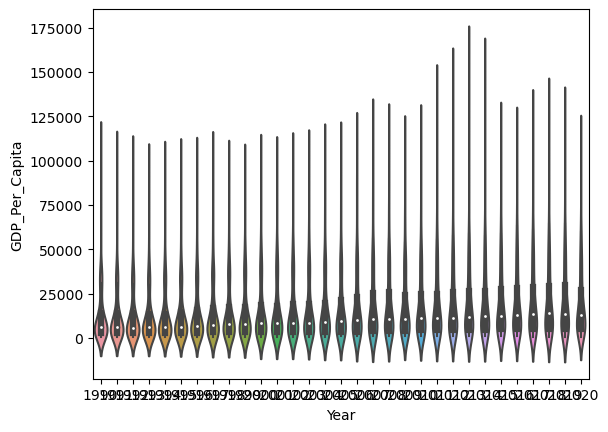

In [13]:
sns.violinplot(x = gdp_df_2['Year'], y = gdp_df_2['GDP_Per_Capita'])

# 9. What was the median GDP per capita value in 2020?

#Defining gdp_2020

In [14]:
gdp_2020 = gdp_df_2.loc[gdp_df_2['Year'] == 2020]
gdp_2020

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
19,Africa Eastern and Southern,2020,3491.978104
50,Africa Western and Central,2020,4021.293919
81,Albania,2020,13253.733337
112,Algeria,2020,10735.382539
...,...,...,...
7025,Vietnam,2020,10338.270543
7056,West Bank and Gaza,2020,5402.538773
7083,World,2020,16269.969854
7114,Zambia,2020,3277.816510


#Describe to show median

In [15]:
gdp_2020.describe()

,Year,GDP_Per_Capita
count,240.0,240.000000
mean,2020.0,19496.881712
std,0.0,19586.817493
min,2020.0,731.064074
25%,2020.0,4945.083068
50%,2020.0,12908.937406
75%,2020.0,27196.648661
max,2020.0,112557.309472


# 10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)

#Query to define decades

In [16]:
years = [1990, 2000, 2010, 2020]

In [17]:
gdp_decades = gdp_df_2.query('Year in @years')
gdp_decades

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
10,Afghanistan,2010,1957.029070
19,Africa Eastern and Southern,2020,3491.978104
29,Africa Eastern and Southern,2010,3545.205203
39,Africa Eastern and Southern,2000,2915.472987
...,...,...,...
7144,Zambia,1990,2190.181724
7145,Zimbabwe,2020,2134.555461
7155,Zimbabwe,2010,1813.531764
7165,Zimbabwe,2000,2771.060576


#Boxplot for Decades

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

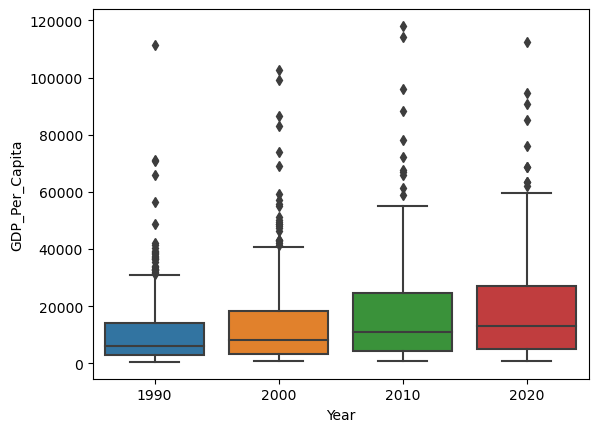

In [18]:
sns.boxplot(x = gdp_decades['Year'], y = gdp_decades['GDP_Per_Capita'])

#Barplot for decades

C:\Users\hunte\AppData\Local\Temp\ipykernel_6856\2210766681.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Year', y = 'GDP_Per_Capita',


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

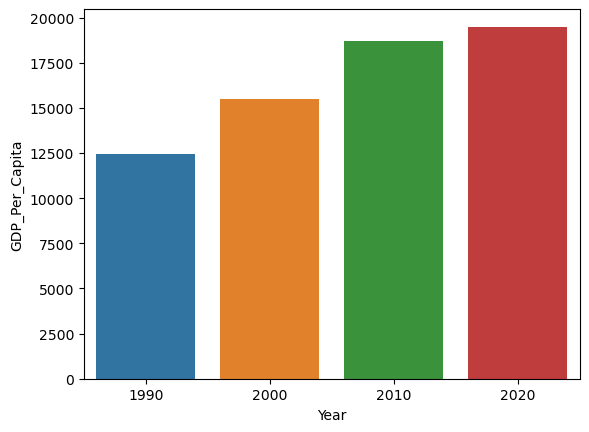

In [19]:
sns.barplot(x = 'Year', y = 'GDP_Per_Capita',
            data = gdp_decades, ci = None)

#Scatterplot for decades

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

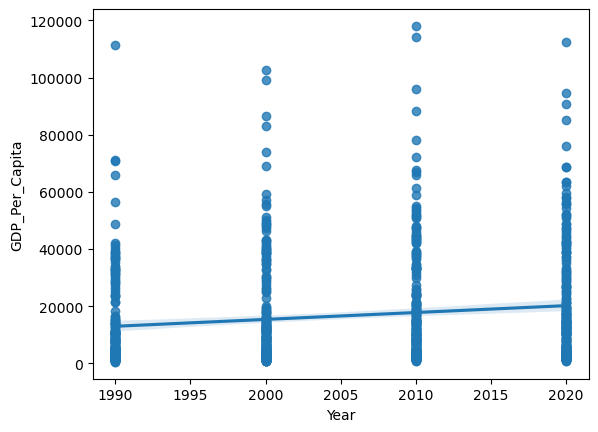

In [20]:
sns.regplot(x = gdp_decades['Year'], y = gdp_decades['GDP_Per_Capita'])

# 11. Which country was the first to have a GDP per capita greater than 100,000?

#find first country with 100k gdp.
#create df for 1990 and .loc to find gdp over 100k

In [21]:
gdp_1990 = gdp_df_2.loc[gdp_df_2['Year'] == 1990]
gdp_1990_100k = gdp_1990.loc[gdp_1990['GDP_Per_Capita'] > 100000]
gdp_1990_100k

,Country,Year,GDP_Per_Capita
6838,United Arab Emirates,1990,111454.055665


# 12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

#create a sorted dataframe to find the top GDP per capita in 2020

In [22]:
gdp_2020_sorted = gdp_2020.sort_values(by = 'GDP_Per_Capita', ascending = False)
gdp_2020_sorted.head(1)

,Country,Year,GDP_Per_Capita
3882,Luxembourg,2020,112557.309472


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

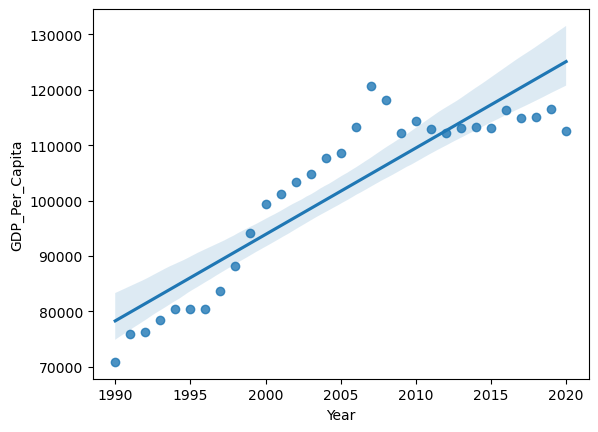

In [23]:
lux_gdp = gdp_df_2.loc[gdp_df_2['Country'] == 'Luxembourg']
sns.regplot(x = lux_gdp['Year'], y = lux_gdp['GDP_Per_Capita'])

# 13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. 

#resort it to find lowest GDP for 2020

In [24]:
gdp_2020_sorted = gdp_2020.sort_values(by = 'GDP_Per_Capita', ascending = True)
gdp_2020_sorted.head(1)

,Country,Year,GDP_Per_Capita
914,Burundi,2020,731.064074


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

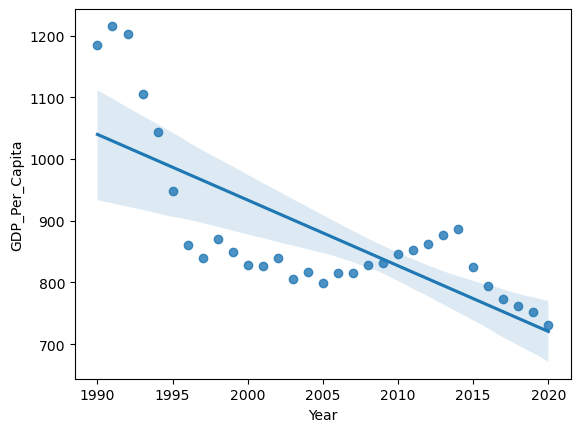

In [25]:
burundi_gdp = gdp_df_2.loc[gdp_df_2['Country'] == 'Burundi']
sns.regplot(x = burundi_gdp['Year'], y = burundi_gdp['GDP_Per_Capita'])

# 13 Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

#join gdp_1990 and gdp_2020

In [26]:
gdp_1990_2020 = pd.merge(gdp_1990, gdp_2020,
                         left_on = 'Country', right_on = 'Country',
                         how = 'inner')
gdp_1990_2020

,Country,Year_x,GDP_Per_Capita_x,Year_y,GDP_Per_Capita_y
0,Africa Eastern and Southern,1990,3083.976800,2020,3491.978104
1,Africa Western and Central,1990,2810.341129,2020,4021.293919
2,Albania,1990,4827.034551,2020,13253.733337
3,Algeria,1990,8746.340762,2020,10735.382539
4,Angola,1990,5758.950488,2020,6141.963839
...,...,...,...,...,...
200,Vanuatu,1990,2855.554643,2020,2878.475335
201,Vietnam,1990,2066.372215,2020,10338.270543
202,World,1990,9704.621768,2020,16269.969854
203,Zambia,1990,2190.181724,2020,3277.816510


In [27]:
#clean up the joined df

In [28]:
gdp_1990_2020 = gdp_1990_2020.rename(columns = {'GDP_Per_Capita_x' : 'gdp_percap_1990', 
                                                'GDP_Per_Capita_y' : 'gdp_percap_2020'})
gdp_1990_2020

,Country,Year_x,gdp_percap_1990,Year_y,gdp_percap_2020
0,Africa Eastern and Southern,1990,3083.976800,2020,3491.978104
1,Africa Western and Central,1990,2810.341129,2020,4021.293919
2,Albania,1990,4827.034551,2020,13253.733337
3,Algeria,1990,8746.340762,2020,10735.382539
4,Angola,1990,5758.950488,2020,6141.963839
...,...,...,...,...,...
200,Vanuatu,1990,2855.554643,2020,2878.475335
201,Vietnam,1990,2066.372215,2020,10338.270543
202,World,1990,9704.621768,2020,16269.969854
203,Zambia,1990,2190.181724,2020,3277.816510


#Drop year columns

In [29]:
gdp_1990_2020 = gdp_1990_2020.drop(columns = ['Year_x', 'Year_y'])
gdp_1990_2020

,Country,gdp_percap_1990,gdp_percap_2020
0,Africa Eastern and Southern,3083.976800,3491.978104
1,Africa Western and Central,2810.341129,4021.293919
2,Albania,4827.034551,13253.733337
3,Algeria,8746.340762,10735.382539
4,Angola,5758.950488,6141.963839
...,...,...,...
200,Vanuatu,2855.554643,2878.475335
201,Vietnam,2066.372215,10338.270543
202,World,9704.621768,16269.969854
203,Zambia,2190.181724,3277.816510


#.loc statement to find countries with 

In [30]:
decrease_gdp = gdp_1990_2020.loc[gdp_1990_2020['gdp_percap_1990'] > gdp_1990_2020['gdp_percap_2020']]
decrease_gdp

,Country,gdp_percap_1990,gdp_percap_2020
9,Aruba,32589.018572,29563.756955
15,Barbados,13985.829980,13316.487393
25,Brunei,71232.789430,62200.882043
28,Burundi,1184.842032,731.064074
33,Central African Republic,1201.674665,937.856470
39,Comoros,3061.328732,2984.413403
40,Congo,5068.286948,3497.565454
44,Dem. Rep. Congo,1819.723315,1082.445242
65,Fragile and conflict affected situations,4874.531032,4450.512739
67,Gabon,18179.170002,14320.844646


In [31]:
decrease_gdp.shape

(22, 3)

# 14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [38]:
internet_df = pd.readcsv(
    "C:\Users\hunte\Documents\NNS-DDA10\python\projects\un_data-hunterfogg668\data\internet_use.csv.csv"
     nrows = 4496)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3832658016.py, line 3)